In [ ]:
import os

import numpy as np 
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 

drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
## Meu caminho
X_train = pd.read_csv('/gdrive/My Drive/Colab Notebooks/train.csv', sep = ',')
X_test = pd.read_csv('/gdrive/My Drive/Colab Notebooks/test.csv', sep = ',')

## Caminho de Jonas
#X_train = pd.read_csv('/gdrive/My Drive/Colab Notebooks/train.csv', sep = ',')
#X_test = pd.read_csv('/gdrive/My Drive/Colab Notebooks/test.csv', sep = ',')


In [ ]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1) Correlação 
* Escolhendo os 10 atributos com maior correlação com o SalePrice

In [ ]:
corr = X_train.corr()
corr['SalePrice'].sort_values(ascending = False)[:11]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [ ]:
X_train = X_train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
                    'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']]
X_test = X_test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
                    'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]

# 2) Exploração inicial

In [ ]:
X_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500
2,7,1786,2,608,920,920,2,6,2001,2002,223500
3,7,1717,3,642,756,961,1,7,1915,1970,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000


In [ ]:
X_train.dtypes

OverallQual     int64
GrLivArea       int64
GarageCars      int64
GarageArea      int64
TotalBsmtSF     int64
1stFlrSF        int64
FullBath        int64
TotRmsAbvGrd    int64
YearBuilt       int64
YearRemodAdd    int64
SalePrice       int64
dtype: object

### 2.1) Medidas de centralidade e dispersão

In [ ]:
#X_train.describe()
X_train.columns

for i in X_train.columns:
  print("Coluna: ", i)
  print("Média: ", X_train[i].mean())
  print("Mediana: ", X_train[i].median())
  print("Desvio padrão: ", X_train[i].std())
  print("Diferença Média e mediana: ", abs(X_train[i].mean() - X_train[i].median()))
  print('\n\n')

Coluna:  OverallQual
Média:  6.0993150684931505
Mediana:  6.0
Desvio padrão:  1.3829965467415923
Diferença Média e mediana:  0.09931506849315053



Coluna:  GrLivArea
Média:  1515.463698630137
Mediana:  1464.0
Desvio padrão:  525.4803834232027
Diferença Média e mediana:  51.46369863013706



Coluna:  GarageCars
Média:  1.7671232876712328
Mediana:  2.0
Desvio padrão:  0.7473150101111116
Diferença Média e mediana:  0.23287671232876717



Coluna:  GarageArea
Média:  472.9801369863014
Mediana:  480.0
Desvio padrão:  213.80484145338076
Diferença Média e mediana:  7.019863013698625



Coluna:  TotalBsmtSF
Média:  1057.4294520547944
Mediana:  991.5
Desvio padrão:  438.7053244594705
Diferença Média e mediana:  65.92945205479441



Coluna:  1stFlrSF
Média:  1162.626712328767
Mediana:  1087.0
Desvio padrão:  386.5877380410738
Diferença Média e mediana:  75.6267123287671



Coluna:  FullBath
Média:  1.5650684931506849
Mediana:  2.0
Desvio padrão:  0.5509158012954318
Diferença Média e mediana:  0.

### 2.2) Boxplots

No handles with labels found to put in legend.


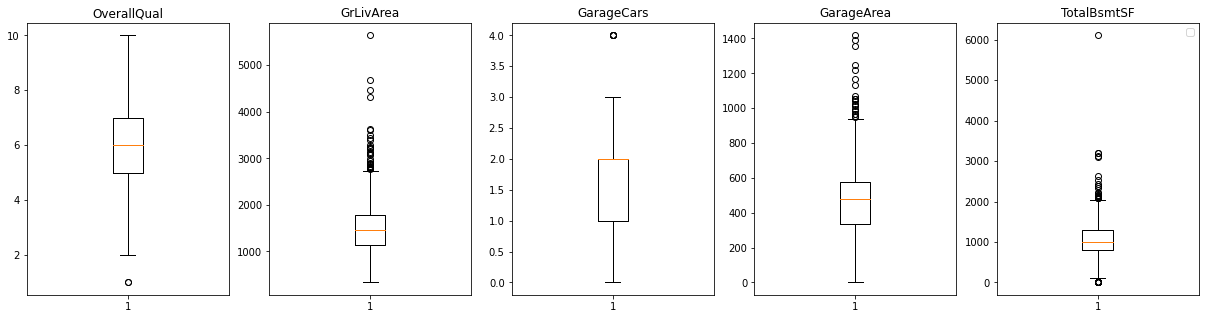

In [ ]:
plt.figure(figsize = (21, 5))

plt.subplot(1, 5, 1)
plt.boxplot(X_train['OverallQual'])
plt.title("OverallQual")

plt.subplot(1, 5, 2) # Criando subplot 2
plt.boxplot(X_train['GrLivArea'])
plt.title("GrLivArea")

plt.subplot(1, 5, 3) 
plt.boxplot(X_train['GarageCars'])
plt.title("GarageCars")

plt.subplot(1, 5, 4) 
plt.boxplot(X_train['GarageArea'])
plt.title("GarageArea")

plt.subplot(1, 5, 5) 
plt.boxplot(X_train['TotalBsmtSF'])
plt.title("TotalBsmtSF")

plt.legend()

Text(0.5, 1.0, 'YearRemodAdd')

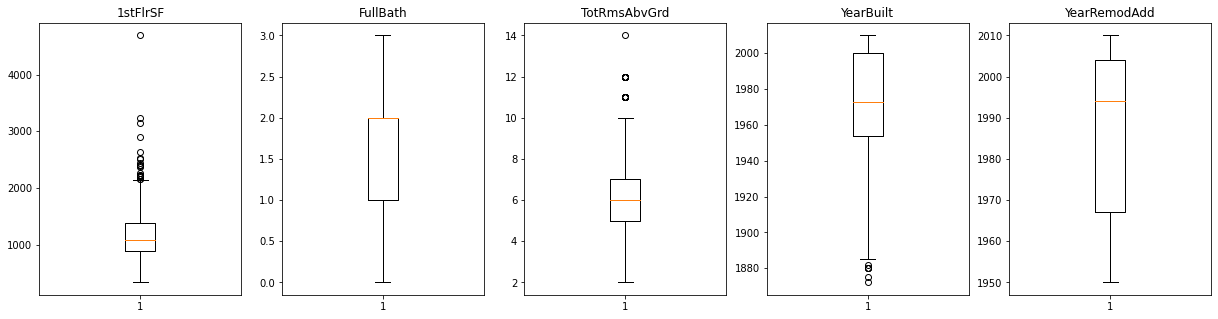

In [ ]:
plt.figure(figsize = (21, 5))

plt.subplot(1, 5, 1)
plt.boxplot(X_train['1stFlrSF'])
plt.title("1stFlrSF")

plt.subplot(1, 5, 2) # Criando subplot 2
plt.boxplot(X_train['FullBath'])
plt.title("FullBath")

plt.subplot(1, 5, 3) 
plt.boxplot(X_train['TotRmsAbvGrd'])
plt.title("TotRmsAbvGrd")

plt.subplot(1, 5, 4) 
plt.boxplot(X_train['YearBuilt'])
plt.title("YearBuilt")

plt.subplot(1, 5, 5) 
plt.boxplot(X_train['YearRemodAdd'])
plt.title("YearRemodAdd")


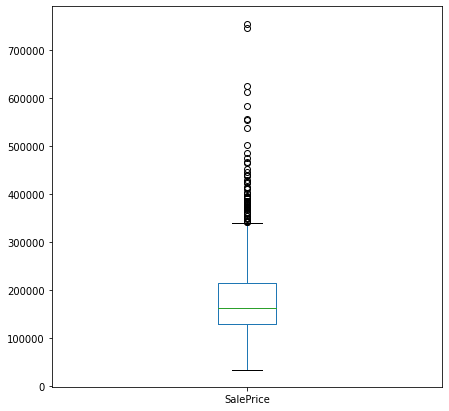

In [ ]:
plt.figure(figsize = (7, 7))

X_train['SalePrice'].plot.box()